In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.dpi'] = 331 # setting the dpi for hd images 


C:\Users\inare\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\inare\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [4]:
california = fetch_california_housing()

In [5]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [8]:
dataset = pd.DataFrame(california.data,columns=california.feature_names)

This code snippet creates a DataFrame named `dataset` using the data stored in `california.data` and assigns column names to it using the feature names stored in `california.feature_names`. Each row of the DataFrame represents a data point, and each column represents a feature of the data. This is a common practice when working with datasets in Python for data analysis and machine learning tasks.

In [9]:
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [10]:
y= dataset['Price']=california.target

```

This assigns the target variable from the `california` dataset to the variable `y` and then adds a new column named `'Price'` to the `dataset` DataFrame, containing the target values. This separation ensures clarity and avoids potential confusion in your code.

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


The `dataset.info()` method provides a concise summary of the dataset, including information about the index dtype and columns, non-null values, and memory usage. Here's what each part of the summary represents:

- **Index dtype and columns:** The first line of the output shows the dtype of the index and lists all the columns in the dataset.

- **Non-null values:** For each column, the summary indicates the count of non-null values present in that column. This count helps to identify missing values or data completeness issues.

- **Data type:** Alongside the non-null count, the data type of each column is displayed. Data types include integers, floats, strings, datetimes, and categorical types, among others.

- **Memory usage:** Finally, the memory usage of the dataset is provided, indicating the amount of memory (in bytes) used by the DataFrame.

Overall, `dataset.info()` is a useful method for quickly understanding the structure, completeness, and memory usage of the dataset, which is essential for data exploration and preprocessing tasks.

In [12]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

The `dataset.isnull().sum()` method is used to count the number of missing values (NaN or None) in each column of the dataset. Here's what each part of the code does:

- `dataset.isnull()`: This part of the code creates a boolean mask where each element is `True` if the corresponding element in the dataset is null (missing), and `False` otherwise.
- `.sum()`: This method is applied to the boolean mask to calculate the sum of `True` values along each column axis, effectively counting the number of missing values in each column.

The output of `dataset.isnull().sum()` is a pandas Series where the index represents the column names of the dataset, and the values represent the count of missing values in each column.

This information is valuable for understanding the completeness of the dataset and deciding how to handle missing data during data preprocessing. Depending on the analysis or modeling task, missing values can be imputed, dropped, or handled using other techniques to ensure the integrity of the data.

In [13]:
dataset.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

The `dataset.describe()` method provides descriptive statistics for each numerical column in the dataset. Here's what each part of the output typically represents:

- **count**: Number of non-null values in each column.
- **mean**: Average value of each column.
- **std**: Standard deviation, which measures the spread of values around the mean.
- **min**: Minimum value in each column.
- **25%**: 25th percentile, also known as the first quartile. It indicates the value below which 25% of the observations fall.
- **50%**: 50th percentile, also known as the median. It represents the middle value of the dataset.
- **75%**: 75th percentile, also known as the third quartile. It indicates the value below which 75% of the observations fall.
- **max**: Maximum value in each column.

The `describe()` method is useful for getting a quick overview of the distribution and summary statistics of numerical data in the dataset. It helps in identifying outliers, understanding the central tendency, and assessing the spread of the data.

In [14]:
plt.show()
sns.pairplot(dataset)

The `plt.show()` function is called to display the pairplot generated by Seaborn's `pairplot()` function. Here's a breakdown of these components:

- **plt.show():**
    - `plt.show()` is a function from the Matplotlib library that displays all currently active Matplotlib figures.
    - It should be called after all plotting commands to display the plot or figures.

- **sns.pairplot(dataset):**
    - `sns.pairplot()` is a Seaborn function used to create a grid of pairwise plots between different variables in a DataFrame.
    - Each plot in the grid represents the relationship between two variables.
    - Diagonal plots show the distribution of individual variables, while off-diagonal plots show the relationship between pairs of variables.
    - It is useful for quickly visualizing relationships and distributions in high-dimensional datasets.

When you call `sns.pairplot(dataset)`, Seaborn generates a grid of plots where each variable in the DataFrame `dataset` is compared with every other variable. This provides a comprehensive overview of the relationships and distributions in the dataset.

Finally, `plt.show()` is used to display the pairplot after it has been created by Seaborn. Without calling `plt.show()`, the pairplot would not be displayed in the output.

In [15]:
dataset.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Price       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     Price  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Population -0.108785   0.099773 -0.024650  
AveOccup    0.002366   0.002476 -0.023737  
Latitude    1.000000  -0.924664 -0.144160  
Longitude  -0.924664   1.000000 -0.045967  
Price      -0.144160  -0.045967  1.000000

### Explanation of `dataset.corr()`:

- **Purpose:**
    - `dataset.corr()` is a Pandas DataFrame method used to compute the correlation matrix of the dataset.
    - It calculates the pairwise correlation coefficients between all pairs of columns in the DataFrame.

- **Output:**
    - The output of `dataset.corr()` is a correlation matrix, where each cell represents the correlation coefficient between two variables.
    - The correlation coefficient measures the strength and direction of the linear relationship between two variables.
    - The values of correlation coefficients range from -1 to 1:
        - 1 indicates a perfect positive correlation,
        - -1 indicates a perfect negative correlation,
        - 0 indicates no correlation between the variables.

- **Usage:**
    - `dataset.corr()` is commonly used to identify patterns and relationships between different features (columns) in the dataset.
    - It helps in understanding the interdependencies among variables and assists in feature selection, model building, and exploratory data analysis (EDA).

- **Parameters:**
    - By default, `dataset.corr()` computes the Pearson correlation coefficients between numeric variables.
    - For categorical variables or other types of correlation measures (e.g., Spearman's rank correlation), additional parameters can be specified.

- **Handling Missing Values:**
    - `dataset.corr()` automatically handles missing values by excluding them from the correlation calculations.

- **Returns:**
    - The output of `dataset.corr()` is a square symmetric DataFrame where rows and columns correspond to the variables in the dataset.
    - Each cell contains the correlation coefficient between the corresponding pair of variables.

- **Visualization:**
    - The correlation matrix generated by `dataset.corr()` is often visualized using plots like heatmaps to provide a graphical representation of the correlations between variables.

### Example:
```python
# Compute the correlation matrix
correlation_matrix = dataset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
```

In this example, `dataset.corr()` computes the correlation matrix, which is then visualized using a heatmap generated by Seaborn's `heatmap()` function. The heatmap provides a visual summary of the correlations between different variables in the dataset.

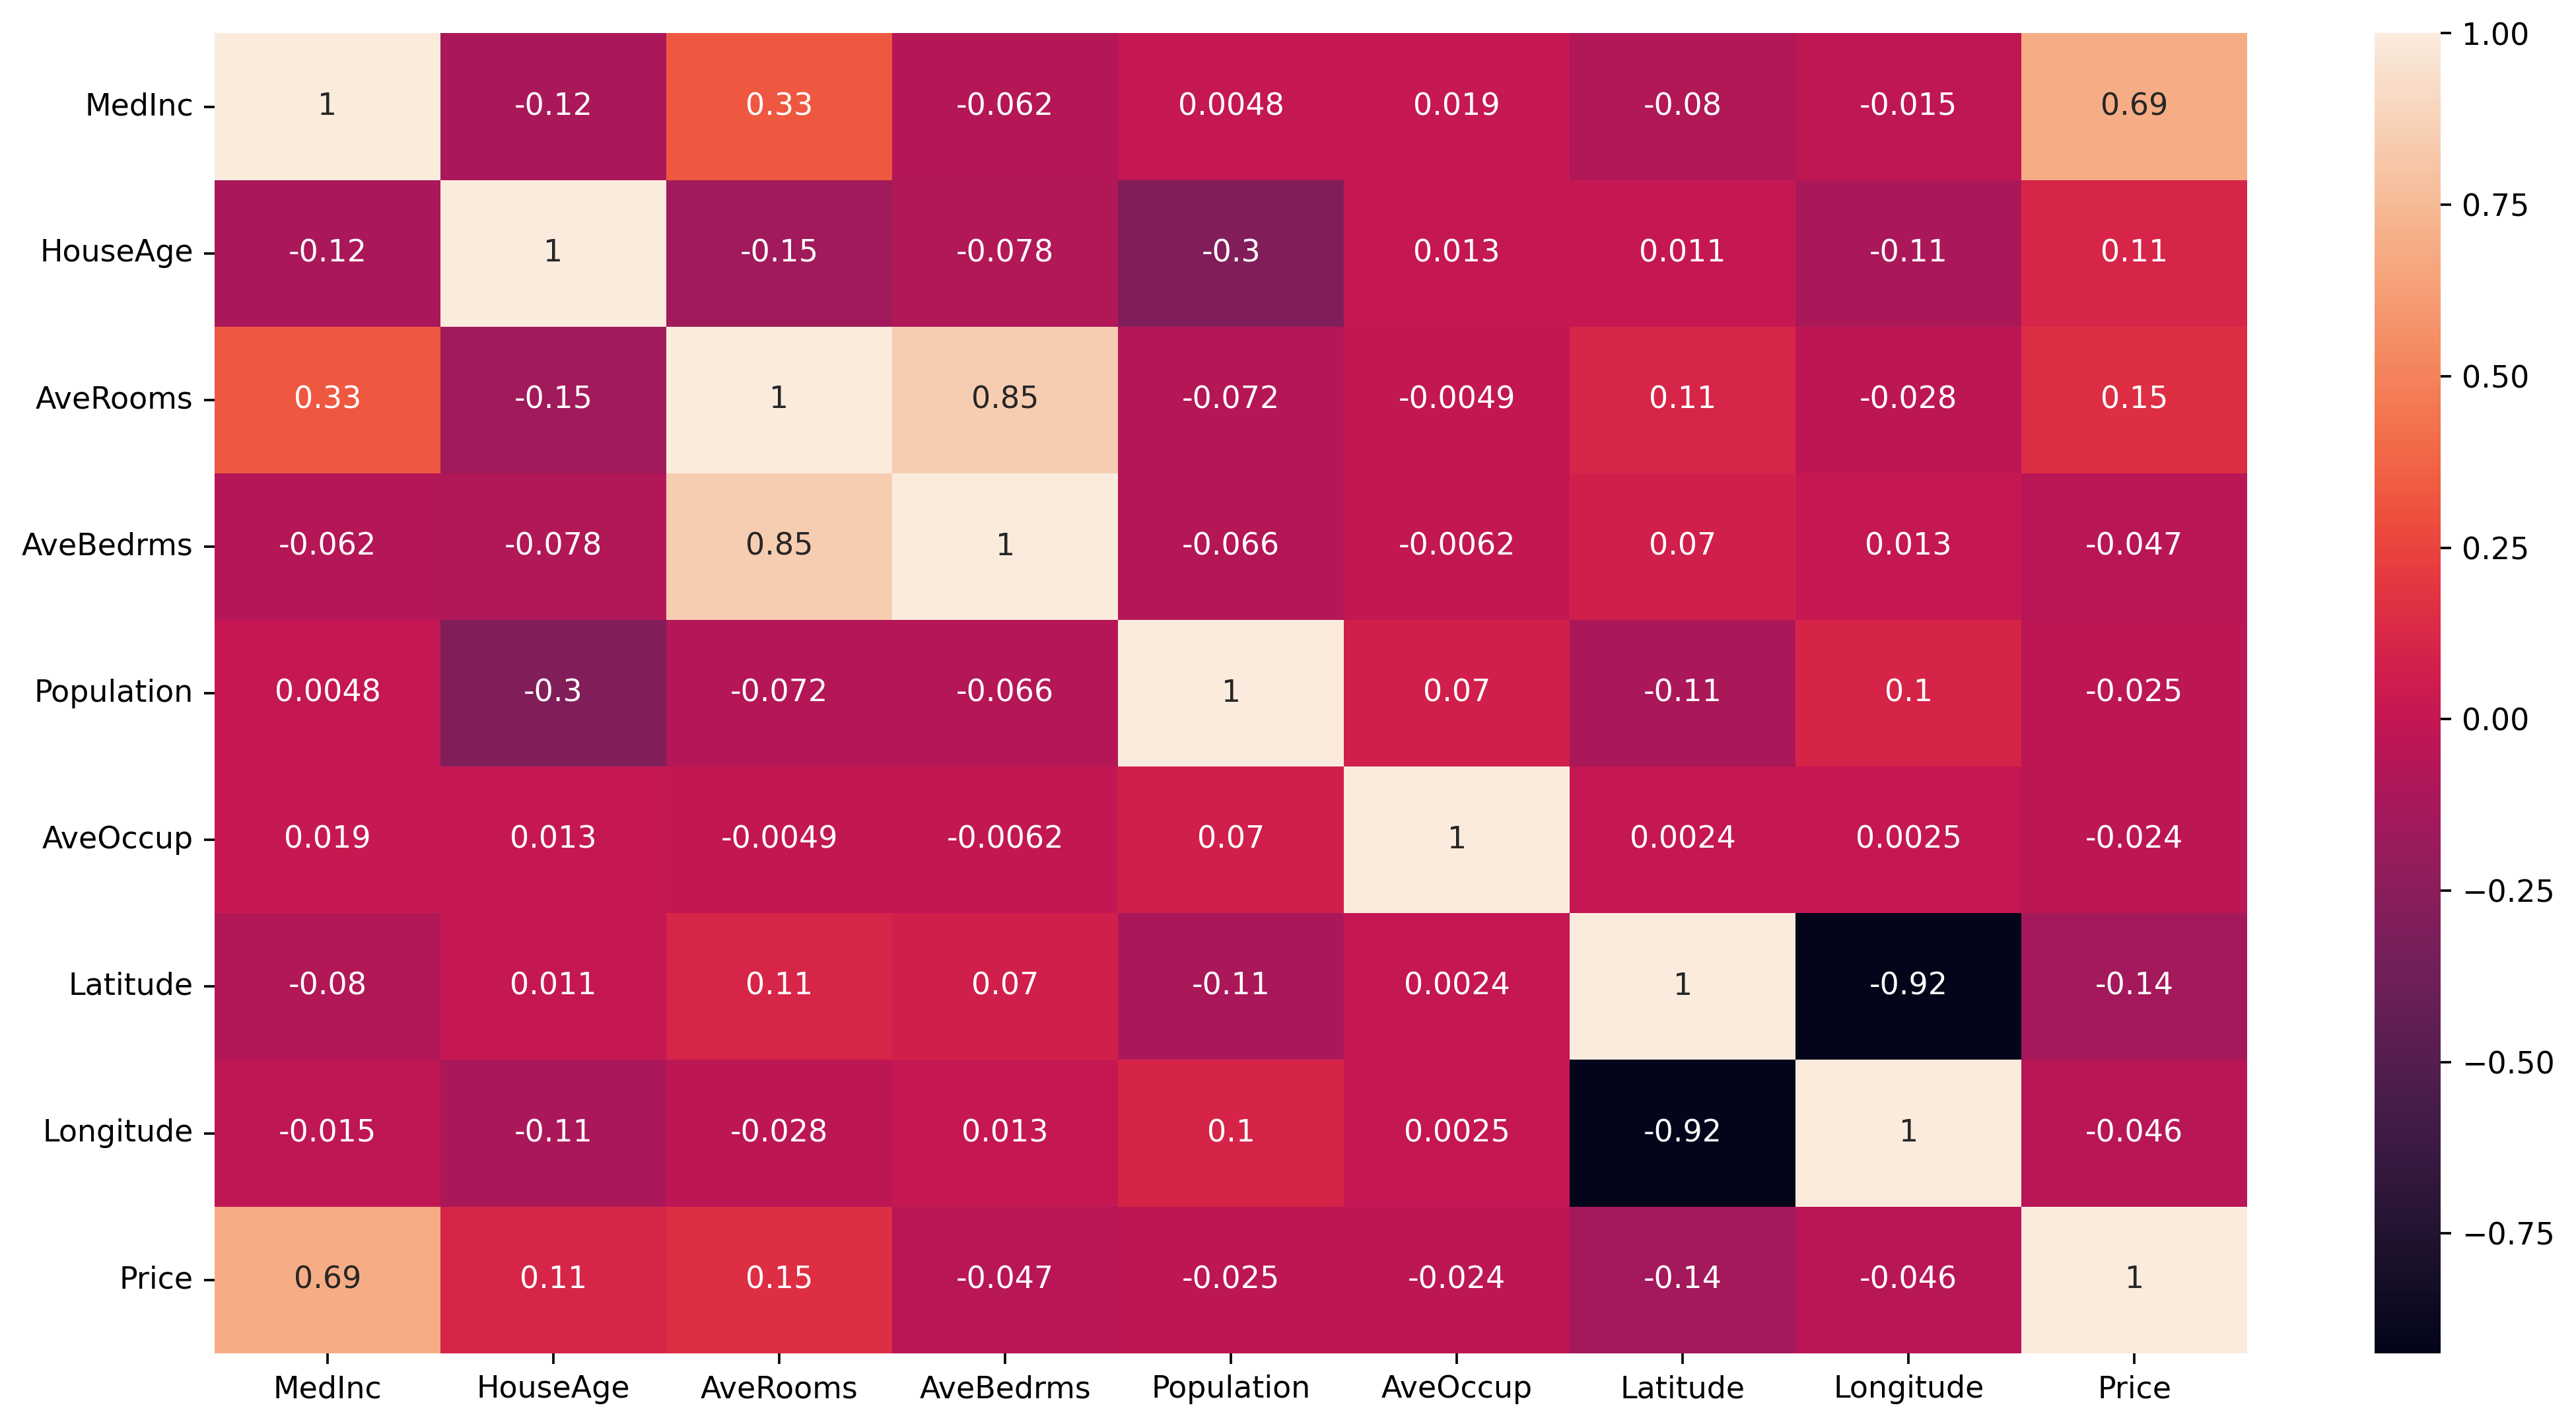

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

### Visualizing Correlation Matrix with Heatmap

```python
plt.figure(figsize=(15, 8))
sns.heatmap(dataset.corr(), annot=True)
plt.show()
```

### Description:

- **plt.figure(figsize=(15, 8)):**
    - Sets the figure size for the heatmap plot to be 15 inches in width and 8 inches in height.
    - Adjusting the figure size ensures better visibility and clarity of the heatmap.

- **sns.heatmap(dataset.corr(), annot=True):**
    - Creates a heatmap to visualize the correlation matrix of the dataset.
    - The `dataset.corr()` function computes the correlation coefficients between all pairs of columns in the dataset.
    - The `annot=True` parameter adds numerical values to each cell in the heatmap, representing the correlation coefficients.

- **plt.show():**
    - Displays the heatmap plot with the correlation matrix.
    - This command is necessary to render the plot on the screen.

### Purpose:
- The heatmap provides a visual representation of the correlation between different features in the dataset.
- It helps in identifying patterns, relationships, and dependencies between variables.
- The annotated values within each cell indicate the strength and direction of correlation, ranging from -1 to 1. Positive values signify positive correlation, negative values denote negative correlation, and values closer to 0 indicate weak or no correlation.

### Interpretation:
- Darker colors represent stronger correlations, while lighter colors indicate weaker correlations or no correlation.
- Analyzing the heatmap helps in identifying highly correlated variables, which can influence feature selection, multicollinearity analysis, and model building in machine learning tasks.

In [17]:
X = dataset.iloc[:,:-1] # Select all rows and all columns except the last column, remember to use [] for iLoc to avoid error - this is the independent features
y = dataset.iloc[:,-1] # Selecting all rows and only the last column of the DataFrame as that is the dependent feature


### Splitting Data into Independent and Dependent Variables

In our dataset, we split the data into independent variables (features) and dependent variables (target) to prepare for the modeling process.

### Extracting the Dependent Variable

The `iloc[:, -1]` statement selects all rows and only the last column of a DataFrame using integer-based indexing (`iloc`). This operation is commonly used to extract the target variable or the dependent variable from the dataset, assuming it is located in the last column.

### Extracting Independent Variables

On the other hand, the `iloc[:, :-1]` statement selects all rows and all columns except the last column in a DataFrame using integer-based indexing (`iloc`). This is done to isolate the independent variables or features of the dataset.

These operations allow us to separate the features from the target variable, enabling us to build predictive models effectively.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

**Explanation:**
- `train_test_split`: This function splits the dataset into random train and test subsets.
- `X_train`: This variable holds the features for the training set.
- `X_test`: This variable holds the features for the testing set.
- `y_train`: This variable holds the target variable corresponding to the training set.
- `y_test`: This variable holds the target variable corresponding to the testing set.
- `X`: This represents the features or independent variables of the dataset.
- `y`: This represents the target variable or the dependent variable of the dataset.
- `test_size`: This parameter determines the size of the testing set. Here, `test_size=0.33` means 33% of the data will be used for testing, and 67% will be used for training.
- `random_state`: This parameter sets the seed for random shuffling during splitting. It ensures that the split is reproducible across multiple runs.

**Detailed Notes:**
- Splitting the dataset is crucial in machine learning to assess model performance on unseen data.
- The `train_test_split` function divides the dataset into training and testing subsets.
- The training set is used to train the model, while the testing set is used to evaluate its performance.
- It's important to maintain the relationship between features and target variables during splitting to ensure consistency in model training and evaluation.
- By specifying `X` and `y` as arguments, the function ensures that features and target variables are split in a consistent manner.
- Setting `random_state` ensures that the data is split in the same way every time the code is run, making the results reproducible.
- The proportion of data allocated to the testing set (`test_size`) should be chosen carefully to balance model evaluation and training data size.


In the `train_test_split` function, the `arrays` parameter is used to pass the arrays you want to split into training and testing sets. Typically, these arrays include your feature variables (often denoted as `X`) and your target variable (often denoted as `y`). The `X` array contains the features used to predict the target variable `y`.

Here are some notes to help understand this concept:

- **`arrays` parameter**: This parameter in the `train_test_split` function is designed to receive one or more arrays that you want to split into training and testing sets.
  
- **`X` and `y` arrays**: 
  - `X`: This array contains the feature variables, which are the inputs to your machine learning model. Each row represents a sample, and each column represents a feature.
  - `y`: This array contains the target variable or the output you are trying to predict using your model. It typically consists of a single column (for single-output regression problems) or one column per class (for classification problems).
  
- **Passing `X` and `y` to `train_test_split`**:
  - When you call `train_test_split(X, y, ...)`, you are passing the feature array (`X`) and the target array (`y`) as arguments to the function.
  - The function then splits both `X` and `y` into training and testing sets according to the specified `test_size` or `train_size` parameters.

- **Usage**:
  - `X`: Contains the input features.
  - `y`: Contains the corresponding target values.
  
- **Splitting process**:
  - The `train_test_split` function randomly shuffles and splits the data into two parts: a training set and a testing set.
  - The training set is used to train the machine learning model, while the testing set is used to evaluate its performance.


In this example, `X` and `y` are passed as arrays to `train_test_split`, which then splits them into training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`).

Overall, `train_test_split` is a fundamental tool for machine learning model development, enabling the assessment of model generalization to unseen data.

In [19]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((13828, 8), (13828,), (6812, 8), (6812,))

Here are the explanations for the provided shapes:

- `X_train.shape`: (13828, 8)
  - There are 13,828 samples in the training set.
  - Each sample has 8 features.

- `y_train.shape`: (13828,)
  - There are 13,828 target values corresponding to the samples in the training set.

- `X_test.shape`: (6812, 8)
  - There are 6,812 samples in the testing set.
  - Each sample in the testing set has 8 features, matching the format of the training set.

- `y_test.shape`: (6812,)
  - There are 6,812 target values corresponding to the samples in the testing set.

These shapes indicate that the dataset has been successfully split into training and testing sets, with the features and target values properly aligned for model training and evaluation.

In machine learning, the input features (often denoted as X) are typically represented as a 2D array or matrix, while the target variable (often denoted as y) is represented as a 1D array or vector.

Here's why:

1. **X (Features)**:
   - X represents the input features of the dataset.
   - It usually consists of multiple variables or attributes that are used to predict the target variable.
   - In most cases, each row in X corresponds to a single sample or observation, and each column corresponds to a different feature.
   - X is represented as a 2D array to maintain consistency and allow for easy manipulation and computation of the features.

2. **y (Target Variable)**:
   - y represents the target variable or the variable we want to predict using the input features X.
   - In regression tasks, y typically represents continuous values, while in classification tasks, y represents class labels.
   - Since y contains only one value for each sample, it is represented as a 1D array or vector.
   - It's often easier to work with y as a 1D array for tasks such as calculating error metrics or fitting models.

In summary, X is represented as a 2D array because it contains multiple features for each sample, while y is represented as a 1D array because it contains a single target value for each sample. This distinction in dimensionality helps maintain clarity and facilitates operations in machine learning algorithms.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

The lines of code you provided are used to scale the features in your dataset using a scaler object. Here's a breakdown of each line:

1. **`X_train=scaler.fit_transform(X_train)`**:
   - `scaler.fit_transform(X_train)`: This method fits the scaler to the training data (`X_train`) and then transforms it.
   - Here, the scaler learns the mean and standard deviation from the training data and uses it to scale the training data.
   - The scaled training data is assigned back to `X_train` variable.

2. **`X_test=scaler.transform(X_test)`**:
   - `scaler.transform(X_test)`: This method applies the same transformation to the test data (`X_test`) using the parameters learned from the training data.
   - It ensures that the test data is scaled using the same mean and standard deviation as the training data.
   - The scaled test data is assigned back to the `X_test` variable.

This process of scaling is essential to ensure that all features are on a similar scale, which can help improve the performance and convergence of machine learning algorithms, especially those based on distance calculations or gradient descent.

Make sure you have already imported and instantiated a scaler object (e.g., StandardScaler, MinMaxScaler) before applying these transformations. The `fit_transform` method is used on the training data, while the `transform` method is used on the test data to prevent data leakage and ensure consistency in scaling between the training and test sets.

In [22]:
X_train

array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]])

In [23]:
X_test

array([[ 0.75154854, -1.31428337, -0.39376169, ...,  0.12606697,
        -0.68820027,  0.19491761],
       [ 0.05935857, -0.12595418, -0.33070668, ..., -0.12021013,
         0.89459042, -1.36503888],
       [ 0.34405687, -1.31428337, -0.41007104, ..., -0.15581759,
        -0.91698123,  0.89764561],
       ...,
       [ 0.36483158,  0.27015554,  0.04216837, ..., -0.08014641,
        -0.46875731, -0.43803598],
       [-0.90412152, -0.91817364,  0.66736933, ..., -0.10263685,
         2.51006411, -1.96808915],
       [-0.43377577,  1.22081889, -0.44835491, ...,  0.2807072 ,
        -0.74422826,  0.69330627]])

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regression=LinearRegression()


In [26]:
regression

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [27]:
regression.fit(X_train,y_train)

LinearRegression()

- **`regression`**: This variable represents your regression model object. It could be an instance of a linear regression model, polynomial regression model, or any other regression model depending on what you've imported and instantiated earlier in your code.

- **`fit(X_train, y_train)`**: This method is used to train (fit) the regression model using the training data. It takes two main arguments:
  - `X_train`: This is the feature matrix containing the independent variables. It consists of the features from your training dataset.
  - `y_train`: This is the target variable or the dependent variable. It contains the corresponding labels or target values from your training dataset.

By calling `fit(X_train, y_train)`, you're instructing the regression model to learn the patterns and relationships between the independent variables (features) and the target variable (labels) from the training data. The model will adjust its parameters to minimize the difference between the predicted values and the actual target values.

After this line of code executes, your regression model is trained and ready to make predictions on new, unseen data. It has learned from the patterns in the training data and can now generalize to make predictions on similar data instances.

In [28]:
## slope or coefficients
regression.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

The `regression.coef_` attribute returns the coefficients or weights of the linear regression model. Here's a brief explanation:

- **`regression.coef_`**: This attribute stores the coefficients of the linear regression model. For a simple linear regression model, where there is only one independent variable, the coefficient represents the slope of the line. For multiple linear regression, where there are multiple independent variables, each coefficient represents the change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other variables constant.

When you call `regression.coef_`, you get an array of coefficients, each corresponding to a feature in your dataset. The coefficients are learned during the training process when the model is fit to the training data using the method `fit(X_train, y_train)`.

You can use these coefficients to understand the relationship between the independent variables and the dependent variable. Positive coefficients indicate that an increase in the corresponding independent variable leads to an increase in the dependent variable, while negative coefficients indicate the opposite.

For example, if you have a coefficient of 2 for a particular feature, it means that a one-unit increase in that feature is associated with a 2-unit increase in the predicted value of the dependent variable (when all other variables are held constant).

Understanding the coefficients helps in interpreting the impact of each feature on the target variable and can provide insights into the underlying relationships in your data.

In [29]:
## intercepts
regression.intercept_

2.0634768086491184

The `regression.intercept_` attribute represents the intercept of the linear regression model. Here's what it means:

- **`regression.intercept_`**: This attribute stores the intercept value of the linear regression model. In a simple linear regression model, the intercept represents the predicted value of the dependent variable when all independent variables are set to zero. In multiple linear regression, the intercept is the value of the dependent variable when all independent variables are zero.

The intercept is learned during the training process when the model is fit to the training data using the method `fit(X_train, y_train)`.

The intercept is an essential component of the linear regression equation, which is of the form:

\[ Y = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n \]

where:
- \( Y \) is the predicted value of the dependent variable,
- \( b_0 \) is the intercept,
- \( b_1, b_2, ..., b_n \) are the coefficients of the independent variables \( X_1, X_2, ..., X_n \) respectively.

The intercept helps to anchor the regression line and adjust the position of the line on the y-axis. It accounts for the baseline value of the dependent variable when all independent variables are zero.

Understanding the intercept is crucial for interpreting the predictions made by the linear regression model, especially in cases where the independent variables cannot be zero. It provides insights into the starting point of the regression line and its relationship with the dependent variable.

In [30]:
## Prediction for the test data
y_pred=regression.predict(X_test)

The `regression.predict(X_test)` method is used to make predictions on the test data based on the trained linear regression model. Here's what it does:

- **`regression.predict(X_test)`**: This method takes the test data (`X_test`) as input and returns the predicted values of the dependent variable (target variable) based on the trained linear regression model (`regression`).

After training the model, it's important to evaluate its performance on unseen data, which is typically the test data. The `predict()` method allows us to obtain predicted values for the target variable using the features (independent variables) from the test dataset.

The predicted values (`y_pred`) obtained from the test data are compared with the actual target values (`y_test`) to assess how well the model generalizes to new, unseen data. This evaluation helps us understand the model's predictive power and its ability to make accurate predictions on new observations.

Once the predictions are obtained, various evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and \( R^2 \) score can be calculated to quantify the performance of the linear regression model on the test data. These metrics provide insights into the accuracy and reliability of the model's predictions.

In [31]:
y_test

20303    1.674
16966    3.541
10623    1.602
6146     1.408
2208     1.078
         ...  
13490    1.123
9340     3.020
17439    1.724
2602     0.838
7180     1.417
Name: Price, Length: 6812, dtype: float64

In [32]:
y_pred

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [33]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5522332399363618
0.537105694300796
0.7431239734636218


The code snippet provided calculates various performance metrics to evaluate the performance of the linear regression model on the test data. Here's a breakdown of the metrics and their interpretation:

1. **Mean Squared Error (MSE)**:
   - The mean squared error is a measure of the average squared difference between the actual and predicted values.
   - It penalizes larger errors more than smaller ones.
   - Lower values of MSE indicate better model performance.
   - It is calculated using the `mean_squared_error()` function from scikit-learn.

2. **Mean Absolute Error (MAE)**:
   - The mean absolute error is a measure of the average absolute difference between the actual and predicted values.
   - It provides a measure of the average magnitude of errors in the predictions.
   - Lower values of MAE indicate better model performance.
   - It is calculated using the `mean_absolute_error()` function from scikit-learn.

3. **Root Mean Squared Error (RMSE)**:
   - The root mean squared error is the square root of the mean squared error.
   - It provides a measure of the average magnitude of errors in the predictions in the same units as the target variable.
   - Lower values of RMSE indicate better model performance.
   - It is calculated by taking the square root of the MSE using `np.sqrt()`.

By calculating and analyzing these metrics, we can assess how well the linear regression model performs in predicting the target variable (dependent variable) based on the features (independent variables) in the test dataset. Lower values of MSE, MAE, and RMSE indicate better model performance and higher accuracy in predicting the target variable.

In [34]:
## R square and adjusted R square

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.593595852643664


The code provided calculates the \( R^2 \) (R-squared) score, which is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Here's a breakdown of \( R^2 \) and adjusted \( R^2 \):

1. ** $( R^2)$ Score**:
   - $( R^2 )$ score measures the goodness of fit of the regression model.
   - It indicates the proportion of the variance in the dependent variable that is explained by the independent variables.
   - $( R^2 )$ score ranges from 0 to 1, where 0 indicates that the model does not explain any variability in the dependent variable, and 1 indicates that the model explains all the variability.
   - $( R^2 )$ is calculated using the `r2_score()` function from scikit-learn.

2. **Adjusted $( R^2 )$ Score**:
   - Adjusted $( R^2 )$ is a modified version of $( R^2 )$ that adjusts for the number of predictors in the model.
   - It penalizes the addition of irrelevant predictors to the model.
   - Adjusted $( R^2 )$ value will always be less than or equal to $( R^2 )$.
   - Adjusted $( R^2 )$ is especially useful when comparing models with different numbers of predictors.
   - Adjusted $( R^2 )$ is not directly provided by scikit-learn but can be calculated manually using the formula.

The $( R^2 )$ score is a key metric for evaluating the performance of regression models. Higher values of $( R^2 )$ indicate a better fit of the model to the data, but it's important to consider adjusted $( R^2 )$ when comparing models with different numbers of predictors.

You can calculate adjusted $( R^2 )$ using the formula:

$[
Adjusted \: R^2 = 1 - \frac{{(1 - R^2) \times (n - 1)}}{{(n - k - 1)}}
]$

where:
- \( n \) is the number of observations.
- \( k \) is the number of independent variables in the model.

This adjusted \( R^2 \) formula penalizes models with a higher number of predictors, making it a useful metric for model comparison.

In [35]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5931179409607519

Text(0, 0.5, 'Test Predicted Data')

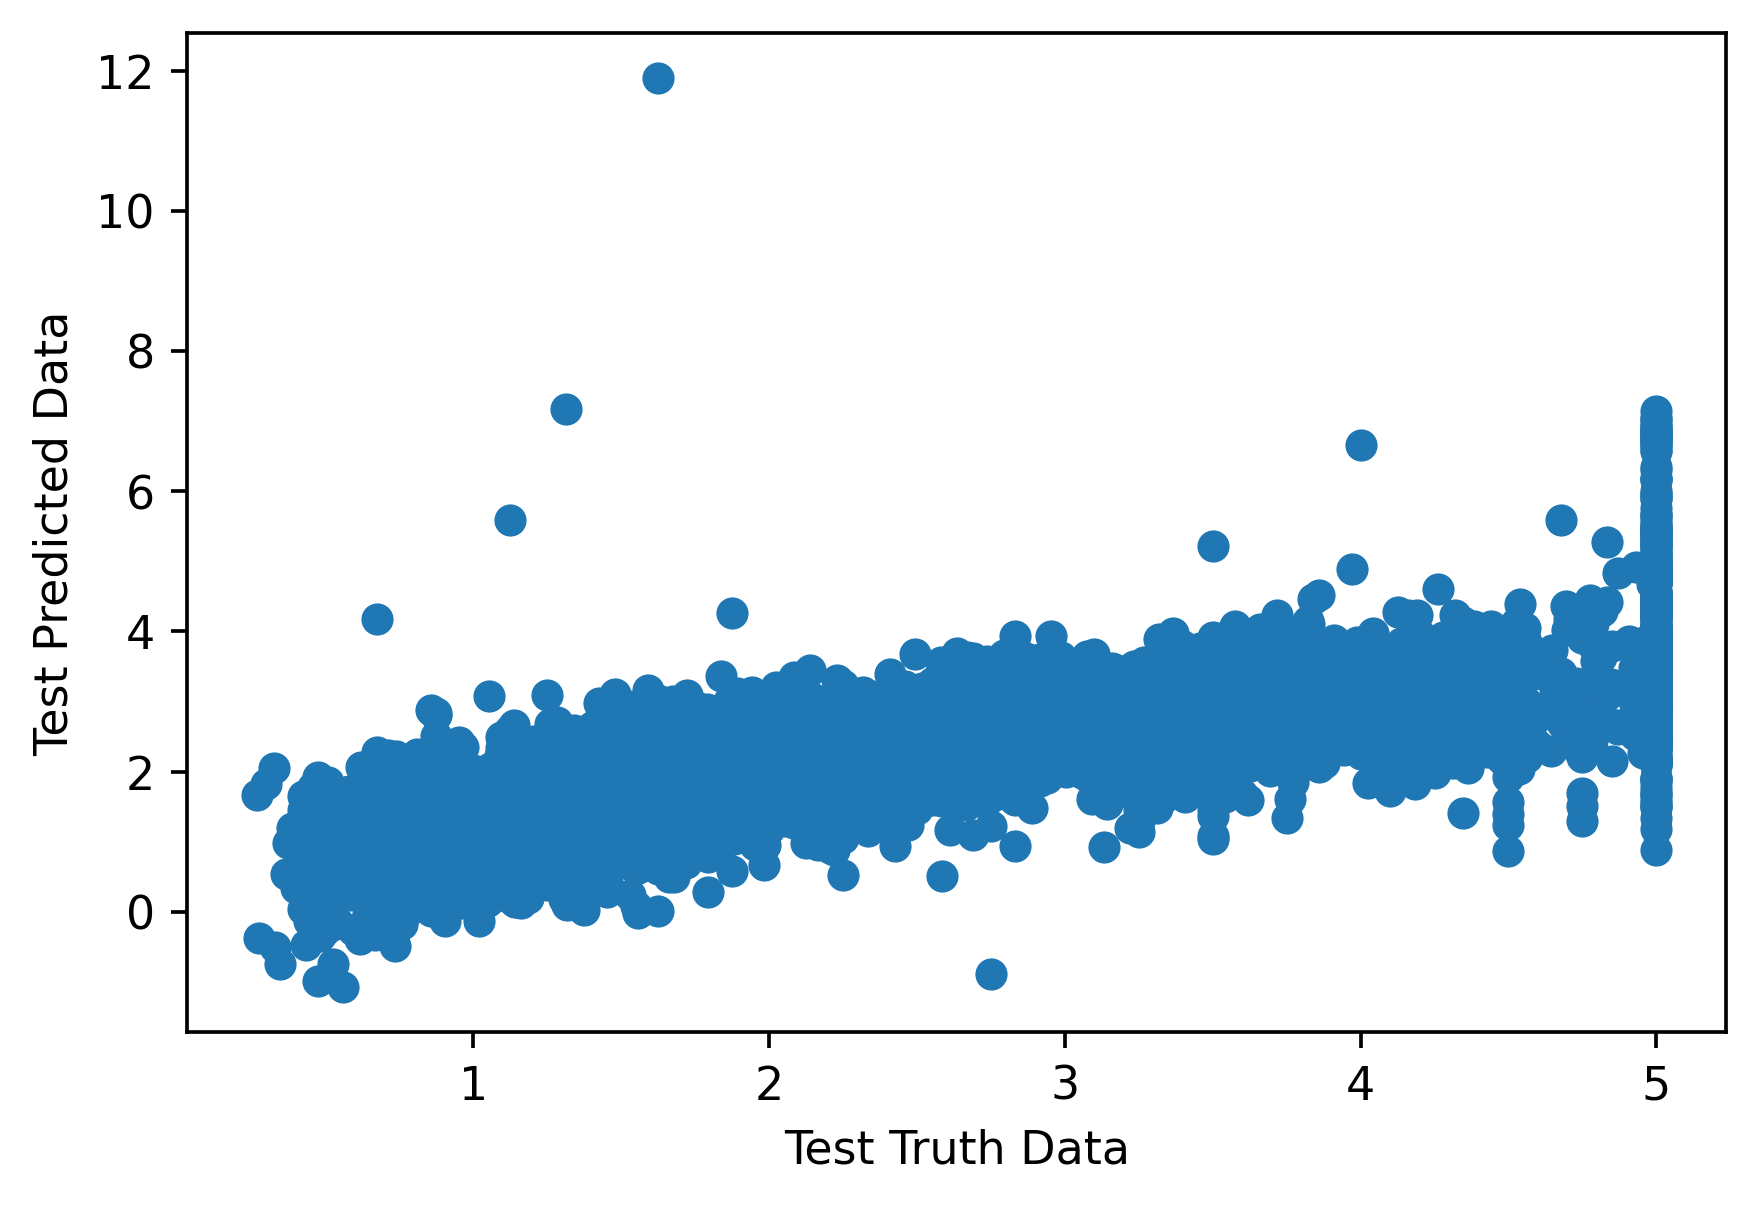

In [36]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [37]:
residuals=y_test-y_pred

The code you provided calculates the residuals, which are the differences between the actual values (y_test) and the predicted values (y_pred) obtained from the regression model. Residuals play a crucial role in assessing the performance and goodness of fit of a regression model. Here's a brief explanation of residuals and their significance:

1. **Residuals**:
   - In the context of regression analysis, residuals represent the discrepancies between the observed values and the values predicted by the regression model.
   - Mathematically, the residual \( e_i \) for each observation \( i \) is calculated as the difference between the actual response \( y_i \) and the predicted response \( \hat{y}_i \):
     \[ e_i = y_i - \hat{y}_i \]
   - Residuals provide insights into how well the model captures the variation in the data. A small residual indicates that the model predicts the response variable accurately for that observation, while a large residual suggests that the model may be inadequate in explaining the observed variation.

2. **Interpreting Residuals**:
   - Ideally, residuals should be randomly distributed around zero, with no discernible patterns. Patterns in residuals may indicate that the model assumptions are violated or that there is unaccounted variability in the data.
   - Common patterns in residuals include heteroscedasticity (unequal variance), non-linearity, and autocorrelation.
   - Visual inspection of residuals through plots like residual plots, QQ plots, and histograms can help identify these patterns and diagnose potential issues with the regression model.

By calculating residuals and analyzing their patterns, you can assess the adequacy of the regression model and identify areas for improvement. Additionally, statistical tests such as the Durbin-Watson test can help formally assess the presence of autocorrelation in residuals.

In [38]:
residuals

20303   -1.329975
16966    0.960885
10623   -0.746908
6146    -0.307462
2208    -0.662167
           ...   
13490   -0.243475
9340     0.507182
17439   -1.366037
2602     0.046480
7180    -0.627770
Name: Price, Length: 6812, dtype: float64

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

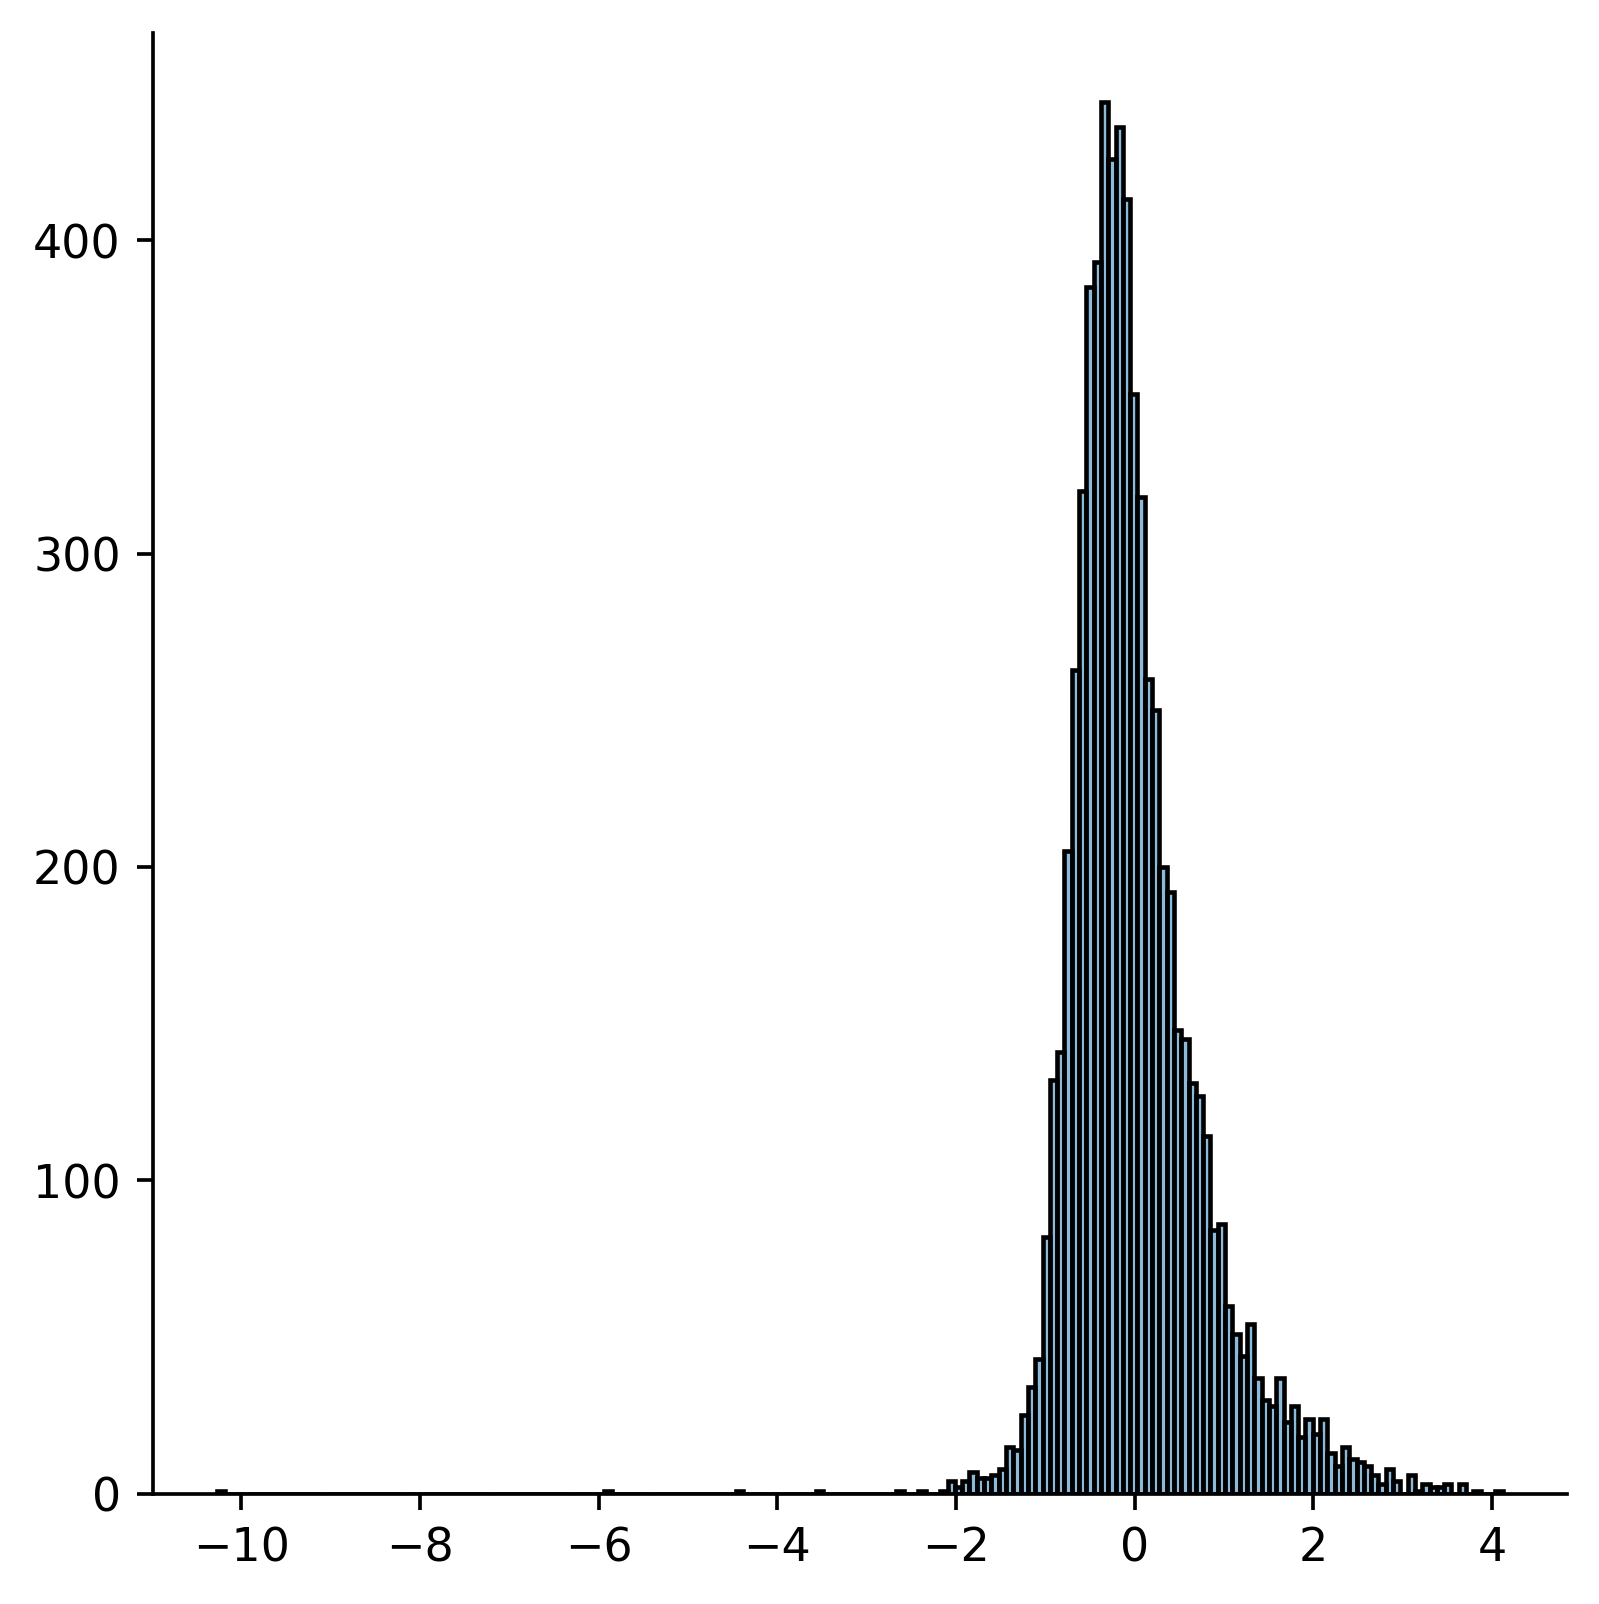

In [39]:
sns.displot(residuals,kde=True)

In [ ]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(y_pred,residuals)

In [40]:
regression

LinearRegression()

In [41]:
import pickle
pickle.dump(regression,open('regressor.pkl','wb'))

In [42]:
model=pickle.load(open('regressor.pkl','rb'))

In [43]:
model.predict(X_test)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

The code provided demonstrates how to use the `pickle` module in Python to save (serialize) a trained regression model to a file and then load (deserialize) the saved model from the file for making predictions. Here's a breakdown of the steps:

1. **Saving the Trained Model**:
   ```python
   pickle.dump(regression, open('regressor.pkl', 'wb'))
   ```
   - `pickle.dump()` is used to serialize the `regression` object (trained regression model) and save it to a file named 'regressor.pkl'.
   - The file is opened in binary write mode ('wb') because `pickle.dump()` works with binary files.

2. **Loading the Saved Model for Prediction**:
   ```python
   model = pickle.load(open('regressor.pkl', 'rb'))
   ```
   - `pickle.load()` is used to deserialize the saved model from the file 'regressor.pkl' and load it into the `model` variable.
   - The file is opened in binary read mode ('rb').

3. **Making Predictions with the Loaded Model**:
   ```python
   model.predict(X_test)
   ```
   - The `predict()` method of the loaded model (`model`) is used to make predictions on the test data (`X_test`).

By saving the trained model to a file, you can reuse it later for making predictions without the need to retrain the model every time. This is especially useful when you have a trained model that you want to deploy in a production environment or share with others for prediction tasks. However, it's essential to ensure compatibility between the version of scikit-learn used to train the model and the version used to load the model during prediction.